## Step 1 Construct features using NLTK

In [2]:
import nltk
from nltk.corpus import stopwords
import string
import json

%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division

randomState = np.random.seed(2)


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1028.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [3]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [4]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [5]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [6]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [7]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [8]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [9]:
def getAverageSentenceLength(words_all, sents):
    
    return len(words_all)/len(sents)


In [10]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [11]:
def getNumberOfPronoun(words):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
         
    for p in pronouns:
        count += words.count(p)
    
    return count

In [12]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [13]:
def getNumberOfConjunction(words):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']

    for c in conjunctions:
        count += words.count(c)
    
    return count

In [14]:
def getNumberOfComma(text):
    return text.count(",")

def getNumberOfDots(text):
    return text.count(".")

def getNumberOfStringList(words, string_list):
    count = 0
    
    for c in string_list:
        count += words.count(c)
    
    return count

def getNumberOfThe(words):
    string_list = ['a', 'an', 'the']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIn(words):
    string_list = ['in', 'on', 'to', 'of']
    
    return getNumberOfStringList(words, string_list)

def getNumberOfIs(words):
    string_list = ['is', 'are', 'was', 'were']
    
    return getNumberOfStringList(words, string_list)


In [15]:
# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'filename': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': [], 'numberOfComma': [], 'numberOfDots': [],
                'numberOfThe': [], 'numberOfIn': [], 'numberOfIs': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['filename'].append(content['filename'])
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(words_all, sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(words_all)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(words_all)/normalizer)
    featureTable['numberOfComma'].append(getNumberOfComma(content['text'])/normalizer)
    featureTable['numberOfDots'].append(getNumberOfDots(content['text'])/normalizer)
    featureTable['numberOfThe'].append(getNumberOfThe(words_all)/normalizer)
    featureTable['numberOfIn'].append(getNumberOfIn(words_all)/normalizer)
    featureTable['numberOfIs'].append(getNumberOfIs(words_all)/normalizer)

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

218


,DisLegomena,HapaxLegomena,averageSentenceLength,filename,numberOfComma,numberOfConjunction,numberOfDots,numberOfIn,numberOfIs,numberOfPronoun,numberOfSentences,numberOfThe,numberUniqueWords
act,,,,,,,,,,,,,
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT V.,0.029130,0.121907,10.663830,3.txt,0.067438,0.079010,0.079010,0.046688,0.015563,0.050878,470,0.035914,0.186552
KING RICHARD III ACT V.,0.028739,0.114565,12.384988,28.txt,0.070772,0.067058,0.058065,0.061584,0.013490,0.023656,413,0.044184,0.186510
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT IV.,0.023965,0.107621,9.317614,3.txt,0.071152,0.067877,0.086335,0.032450,0.014588,0.041084,721,0.032599,0.169098
"THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT V.",0.028094,0.107278,9.265133,8.txt,0.065334,0.074219,0.086633,0.047171,0.019339,0.043512,826,0.045603,0.169345
THE TWO GENTLEMEN OF VERONA ACT II.,0.023506,0.091991,9.959538,36.txt,0.077481,0.089234,0.082995,0.039756,0.019588,0.061956,692,0.032937,0.147998


In [16]:
# Filter out wierd acts, e.g. the beginning of a play

# df = df[df['averageSentenceLength'] < 30]

df.drop(["A MIDSUMMER NIGHT'S DREAM ACT1596","ALLS WELL THAT ENDS WELL ACT1603", "AS YOU LIKE IT ACT1601", 
              "CYMBELINE ACT1609","KING HENRY THE EIGHTH ACT1611","KING JOHN ACT1597","KING RICHARD III ACT1593",
             "KING RICHARD THE SECOND ACT1596", "LOVE'S LABOUR'S LOST ACT1595", "MEASURE FOR MEASURE ACT1605",
             "MUCH ADO ABOUT NOTHING ACT1599", "SECOND PART OF KING HENRY IV ACT1598", "THE COMEDY OF ERRORS ACT1593",
             "THE FIRST PART OF HENRY THE SIXTH ACT1592", "THE FIRST PART OF KING HENRY THE FOURTH ACT1598",
             "THE HISTORY OF TROILUS AND CRESSIDA ACT1602", "THE LIFE OF KING HENRY THE FIFTH ACT1599",
             "THE LIFE OF TIMON OF ATHENS ACT1608", "THE MERCHANT OF VENICE ACT1597", "THE MERRY WIVES OF WINDSOR ACT1601",
             "THE SECOND PART OF KING HENRY THE SIXTH ACT1591", "THE TAMING OF THE SHREW ACT1594", "THE TEMPEST ACT1612",
             "THE TRAGEDY OF ANTONY AND CLEOPATRA ACT1607", "THE TRAGEDY OF CORIOLANUS ACT1608",
              "THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT1604","THE TRAGEDY OF JULIUS CAESAR ACT1599",
             "THE TRAGEDY OF KING LEAR ACT1606", "THE TRAGEDY OF MACBETH ACT1606", 
              "THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT1605", "THE TRAGEDY OF ROMEO AND JULIET ACT1595",
             "THE TRAGEDY OF TITUS ANDRONICUS ACT1594", "THE TWO GENTLEMEN OF VERONA ACT1595", "THE WINTER'S TALE ACT1611",
             "TWELFTH NIGHT; OR, WHAT YOU WILL ACT1602", "THE THIRD PART OF KING HENRY THE SIXTH ACT1591"], inplace = True)

df_2 = df[['numberUniqueWords', 'averageSentenceLength']]
df_3 = df[['numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun']]
df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction', 'numberOfComma', 'numberOfDots',
                'numberOfThe', 'numberOfIn', 'numberOfIs']]

/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


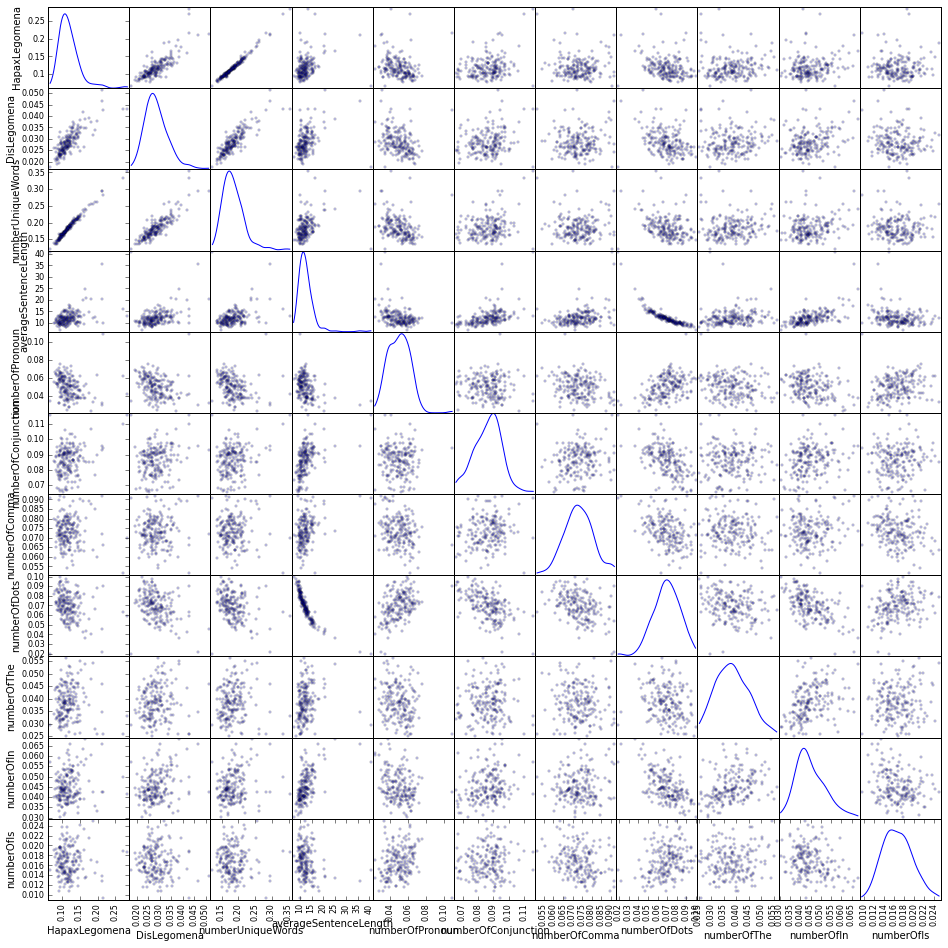

In [17]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [18]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation
import numpy as np

In [20]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True)
    X_tfidf = tfidf_transformer.fit_transform(X_counts)
    return X_tfidf

In [21]:


def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X

    

In [22]:
# Features from n-grams, use fewer components
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title)
df_ngrams.head()

Explained variance of the SVD step: 4%


,0,1,2,3,4,5
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT V.,0.242823,0.148154,-0.149392,-0.228533,-0.066693,-0.916566
KING RICHARD III ACT V.,0.256254,0.089490,-0.241191,0.541609,0.755066,-0.068463
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT IV.,0.100170,0.125046,-0.314543,-0.164393,-0.253892,-0.885385
"THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT V.",0.496322,-0.032329,-0.322403,0.381245,-0.344558,0.620168
THE TWO GENTLEMEN OF VERONA ACT II.,0.220934,0.333357,-0.268629,0.418830,-0.699456,-0.321315


## Step 3 Combine n-grams and other features

In [23]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,averageSentenceLength,numberOfPronoun,numberOfConjunction,numberOfComma,numberOfDots,numberOfThe,numberOfIn,numberOfIs,0,1,2,3,4,5
act,,,,,,,,,,,,,,,,,
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT V.,0.121907,0.029130,0.186552,10.663830,0.050878,0.079010,0.067438,0.079010,0.035914,0.046688,0.015563,0.242823,0.148154,-0.149392,-0.228533,-0.066693,-0.916566
KING RICHARD III ACT V.,0.114565,0.028739,0.186510,12.384988,0.023656,0.067058,0.070772,0.058065,0.044184,0.061584,0.013490,0.256254,0.089490,-0.241191,0.541609,0.755066,-0.068463
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT IV.,0.107621,0.023965,0.169098,9.317614,0.041084,0.067877,0.071152,0.086335,0.032599,0.032450,0.014588,0.100170,0.125046,-0.314543,-0.164393,-0.253892,-0.885385
"THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT V.",0.107278,0.028094,0.169345,9.265133,0.043512,0.074219,0.065334,0.086633,0.045603,0.047171,0.019339,0.496322,-0.032329,-0.322403,0.381245,-0.344558,0.620168
THE TWO GENTLEMEN OF VERONA ACT II.,0.091991,0.023506,0.147998,9.959538,0.061956,0.089234,0.077481,0.082995,0.032937,0.039756,0.019588,0.220934,0.333357,-0.268629,0.418830,-0.699456,-0.321315


## Step 4 Clustering

In [33]:
def getLabels(X, n_clusters = 8, method = 'KMeans'):
    
    if method == 'KMeans':
        cluster = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, 
                         n_init=5, random_state = randomState)   
    elif method == 'AffinityPropagation':
        cluster = AffinityPropagation(max_iter=1000)    

    return cluster.fit_predict(X)
        

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')
        
def print2D(X, x_label, y_label, title, labels):
    plt.figure(figsize = (9,7))
    plt.scatter(X[:,0], X[:,1], c=labels, marker='+', s=100, linewidths=2)
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    
    xrange = xmax - xmin
    yrange = ymax - ymin
    
    xmin = xmin - xrange/10
    xmax = xmax + xrange/10
    
    ymin = ymin - yrange/10
    ymax = ymax + yrange/10
    
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.show()  

In [34]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics

def clusterDocuments(X, scaled = False, n_clusters = 8, method = 'KMeans', visualize = True, verbose = True):
    if scaled:
        X = preprocessing.scale(X)
    labels = getLabels(X, n_clusters, method)
    
    pca = PCA(n_components=2)
    X_2D_PCA = pca.fit_transform(X)
    
    if visualize:
        print2D(X_2D_PCA, 'PCA 1st component', 'PCA 2nd component', method, labels)
    
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, random_state=randomState))
    
    if verbose:
        printClusters(labels)

In [29]:
# Cluster only using n-grams as features
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 20)
labels = getLabels(X, n_clusters = 20)
printClusters(labels)

Explained variance of the SVD step: 12%
[7, 17, 63, 69, 110, 145, 168, 174]
['SECOND PART OF KING HENRY IV ACT III' 'AS YOU LIKE IT ACT V. '
 'SECOND PART OF KING HENRY IV ACT I. '
 'SECOND PART OF KING HENRY IV ACT V. '
 'SECOND PART OF KING HENRY IV ACT II.'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT I. '
 'THE HISTORY OF TROILUS AND CRESSIDA ACT III' 'THE TEMPEST ACT II.']


[31, 33, 53, 67, 71, 90, 97, 100, 116]
['THE MERCHANT OF VENICE ACT I. ' 'KING HENRY THE EIGHTH ACT III'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT III'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT IV.'
 'THE MERCHANT OF VENICE ACT III' 'THE TRAGEDY OF KING LEAR ACT V. '
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT I. '
 'THE FIRST PART OF KING HENRY THE FOURTH ACT IV.'
 'THE MERCHANT OF VENICE ACT V. ']


[20, 50, 74, 77, 82, 107, 150, 151, 162, 166]
['CYMBELINE ACT I. ' 'CYMBELINE ACT II.'
 'THE TWO GENTLEMEN OF VERONA ACT V. ' 'THE TRAGEDY OF MACBETH ACT II.'
 'THE TRAGEDY OF MACBETH ACT IV.' 'MEASURE 

> By only using n-grams + td-idf + SVD (20 components), acts are grouped mainly according to their topics. Acts of the same play go to the same cluster.

### K-Means

In [30]:
# Cluster using all features
X = df_all.values
for n in np.arange(2,20,1):
    print("number of clusters: ", n)
    clusterDocuments(X, scaled = True, n_clusters = 8, method = 'KMeans', visualize = False, verbose = False)

number of clusters:  2
Silhouette Coefficient: 0.106
number of clusters:  3
Silhouette Coefficient: 0.085
number of clusters:  4
Silhouette Coefficient: 0.105
number of clusters:  5
Silhouette Coefficient: 0.113
number of clusters:  6
Silhouette Coefficient: 0.092
number of clusters:  7
Silhouette Coefficient: 0.097
number of clusters:  8
Silhouette Coefficient: 0.113
number of clusters:  9
Silhouette Coefficient: 0.108
number of clusters:  10
Silhouette Coefficient: 0.108
number of clusters:  11
Silhouette Coefficient: 0.116
number of clusters:  12
Silhouette Coefficient: 0.112
number of clusters:  13
Silhouette Coefficient: 0.104
number of clusters:  14
Silhouette Coefficient: 0.108
number of clusters:  15
Silhouette Coefficient: 0.108
number of clusters:  16
Silhouette Coefficient: 0.100
number of clusters:  17
Silhouette Coefficient: 0.113
number of clusters:  18
Silhouette Coefficient: 0.102
number of clusters:  19
Silhouette Coefficient: 0.104


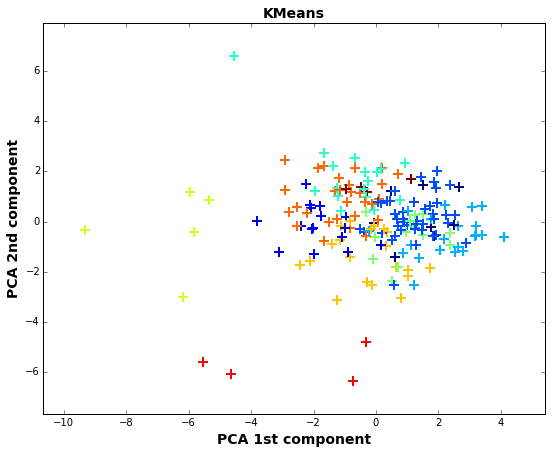

Silhouette Coefficient: 0.125
[13, 30, 37, 38, 78, 84, 102, 176]
['TWELFTH NIGHT; OR, WHAT YOU WILL ACT V. '
 'TWELFTH NIGHT; OR, WHAT YOU WILL ACT II.'
 'THE MERCHANT OF VENICE ACT IV.'
 'TWELFTH NIGHT; OR, WHAT YOU WILL ACT I. '
 'TWELFTH NIGHT; OR, WHAT YOU WILL ACT IV.'
 'MUCH ADO ABOUT NOTHING ACT II.' 'THE TRAGEDY OF KING LEAR ACT I. '
 'TWELFTH NIGHT; OR, WHAT YOU WILL ACT III']


[16, 22, 28, 47, 80, 81, 89, 94, 95, 107, 113, 133, 138, 156, 160, 173]
['THE FIRST PART OF HENRY THE SIXTH ACT I. ' 'THE TEMPEST ACT IV.'
 'THE SECOND PART OF KING HENRY THE SIXTH ACT V. '
 'THE FIRST PART OF HENRY THE SIXTH ACT II.'
 'THE LIFE OF KING HENRY THE FIFTH ACT II.'
 'THE FIRST PART OF HENRY THE SIXTH ACT III'
 'THE TRAGEDY OF MACBETH ACT I. ' 'THE TEMPEST ACT V. '
 'KING HENRY THE EIGHTH ACT IV.' 'MEASURE FOR MEASURE ACT I. '
 'KING HENRY THE EIGHTH ACT II.' "THE WINTER'S TALE ACT III"
 'THE LIFE OF TIMON OF ATHENS ACT V. '
 'THE FIRST PART OF HENRY THE SIXTH ACT V. '
 'THE FIRST PART OF H

In [31]:
X = df_all.values
clusterDocuments(X, scaled = True, n_clusters = 11, method = 'KMeans', visualize = True, verbose = True)

> By adding the features of average sentence length, number of unique words normalized by total number of words, fequency of conjunctions, and etc., acts are clustered according to the writing style (need to be verified by visualization).

### Affinity Propagation

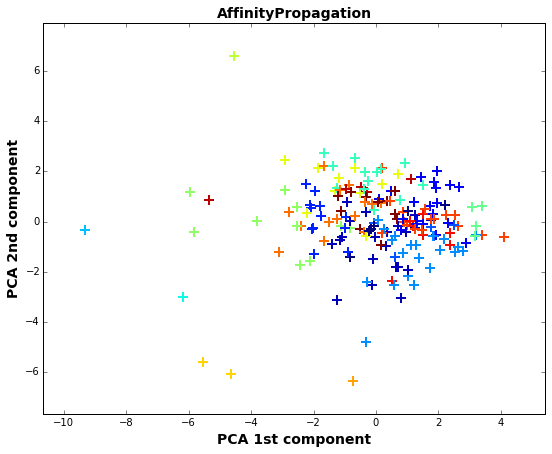

Silhouette Coefficient: 0.099
[7, 23, 44, 69, 88, 110, 116]
['SECOND PART OF KING HENRY IV ACT III' "LOVE'S LABOUR'S LOST ACT IV."
 "LOVE'S LABOUR'S LOST ACT III" 'SECOND PART OF KING HENRY IV ACT V. '
 'THE MERRY WIVES OF WINDSOR ACT V. '
 'SECOND PART OF KING HENRY IV ACT II.' 'THE MERCHANT OF VENICE ACT V. ']


[3, 8, 14, 15, 19, 27, 29, 31, 34, 72, 77, 82, 89, 132, 141, 151, 158, 162, 166, 178]
['THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT V. '
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT I. ' 'AS YOU LIKE IT ACT IV.'
 'THE TRAGEDY OF MACBETH ACT III' 'THE LIFE OF TIMON OF ATHENS ACT IV.'
 "A MIDSUMMER NIGHT'S DREAM ACT IV." "LOVE'S LABOUR'S LOST ACT V. "
 'THE MERCHANT OF VENICE ACT I. '
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT II.'
 "LOVE'S LABOUR'S LOST ACT II." 'THE TRAGEDY OF MACBETH ACT II.'
 'THE TRAGEDY OF MACBETH ACT IV.' 'THE TRAGEDY OF MACBETH ACT I. '
 'THE LIFE OF KING HENRY THE FIFTH ACT III'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT II.'
 'THE TRAGEDY OF KING LE

/Users/byan/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [35]:
clusterDocuments(X, scaled = True, method = 'AffinityPropagation')

/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


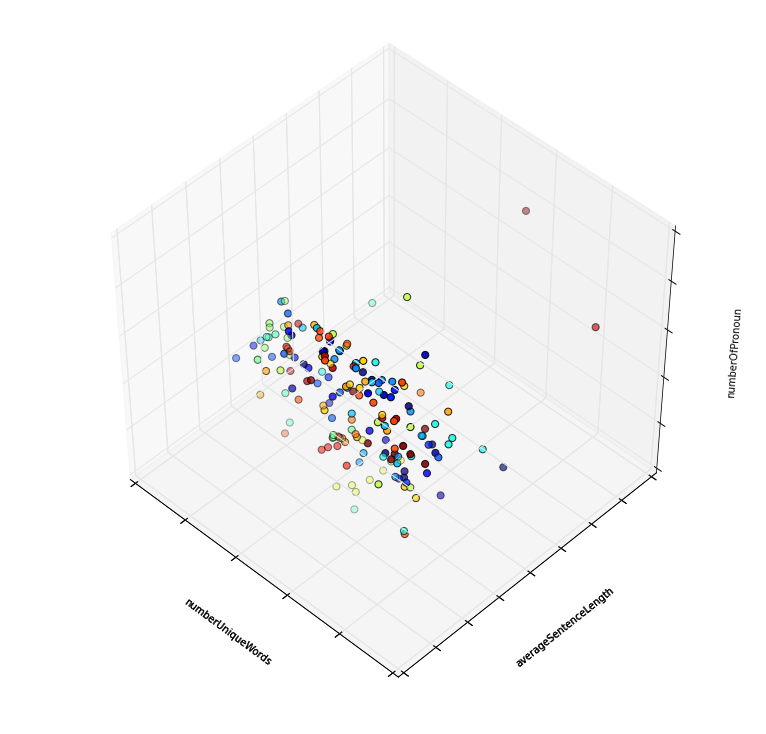

In [36]:
def print3D(X, x_label, y_label, z_label, title, labels):
    fig = plt.figure(1, figsize=(11, 10))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    
    ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=labels.astype(np.float), s=50)
    ax.dist = 11

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    
pca = PCA(n_components=3)
X_3D_PCA = pca.fit_transform(X)

print3D(X_3D_PCA, 'numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun', 'title', labels)